In [ ]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 

In [39]:
class ucb_markovian_bandit:
    def __init__(self, p1, q1, p2, q2):
        # Initialization

        # Number of arms
        self.k = 2
        # Number of iterations
        self.iters = 100000
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # parameters for both arms
        self.p1=p1
        self.q1=q1
        self.prev_state1=0
        self.curr_state1=1
        self.state0_count1=0
        self.state1_count1=1
        self.p2=p2
        self.q2=q2
        self.prev_state2=0
        self.curr_state2=1
        self.state0_count2=0
        self.state1_count2=1
        self.p= np.array([self.p1, self.p2])
        self.q= np.array([self.q1, self.q2])
        self.prev_state= np.array([self.prev_state1, self.prev_state2])
        self.curr_state= np.array([self.curr_state1, self.curr_state2])
        self.state0_count= np.array([self.state0_count1, self.state0_count2])
        self.state1_count= np.array([self.state1_count1, self.state1_count2])
        self.state01_count= np.array([1, 1])
        self.state11_count= np.array([0, 0])
        self.arm1= np.array([self.p1, self.q1, self.prev_state1, self.curr_state1, self.state0_count1, self.state1_count1])
        self.arm2= np.array([self.p2, self.q2, self.prev_state2, self.curr_state2, self.state0_count2, self.state1_count2])
        # Mean reward for each arm
        self.q_k = np.array([self.p1/(1-self.q1+self.p1),self.p2/(1-self.q2+self.p2)])
        self.q_k_up = np.array([0, 0])

        # Total mean reward
        self.total_reward = 0
        self.reward = np.zeros(iters)
        self.regret = np.zeros(iters)
        # total reward calculation
        self.reward_sum=0
        
        
        
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.q_k_up + np.sqrt(2*(np.log(self.n)) / self.k_n))
        if(self.curr_state[a]==0):
          self.prev_state[a]= self.curr_state[a]
          if np.random.uniform(0,1)<self.p[a]:
            self.curr_state[a]=1
            self.state1_count[a] += 1
            reward=1
          else:
            self.curr_state[a]=0
            self.state0_count[a] += 1
            reward=0
        else:
          self.prev_state[a]= self.curr_state[a]
          if np.random.uniform(0,1)<self.q[a]:
            self.curr_state[a]=1
            self.state1_count[a] += 1
            reward=1
          else:
            self.curr_state[a]=0
            self.state0_count[a] += 1
            reward=0


        # Update state count
        if (self.prev_state[a]==0) and (self.curr_state[a]==1):
          self.state01_count[a] += 1
        elif (self.prev_state[a]==1) and (self.curr_state[a]==1):
          self.state11_count[a] += 1
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        # Update p and q
        self.p[a]= self.state01_count[a]/self.state0_count[a]
        self.q[a]= self.state11_count[a]/self.state1_count[a]
        # Update total mean reward
        #self.total_reward += reward
        # Update results for mean reward for each arm
        #self.q_k[a] = self.q_k[a] + (reward - self.q_k[a]) / self.k_n[a]
        self.q_k[a] = (self.q_k[a]*(self.k_n[a]-1) +reward ) / self.k_n[a]
        self.q_k_up = np.array([self.p[0]/(1-self.q[0]+self.p[0]),self.p[1]/(1-self.q[1]+self.p[1])])
        rew=0
        if a==0:
          rew = self.p1/(1-self.q1+self.p1)
        else:
          rew = self.p2/(1-self.q2+self.p2)
        self.total_reward += rew
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            #self.reward[i] = self.mean_reward
            uk=max(self.p1/(1-self.q1+self.p1),self.p2/(1-self.q2+self.p2))
            self.regret[i] = i*uk - self.total_reward
            #self.reward_sum += self.reward[i]
            
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


99702.0
300.0


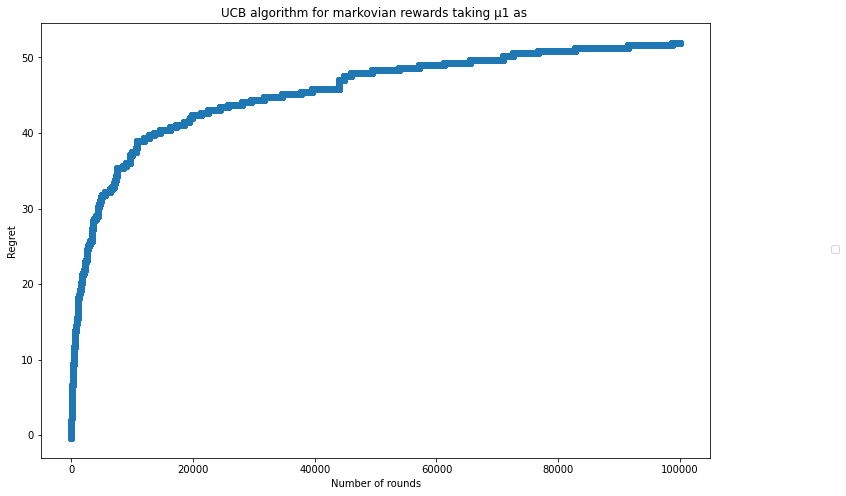

In [40]:
k = 2 
iters = 100000
p1=0.3
q1=0.5
p2=0.1
q2=0.6

ucb_rewards = np.zeros(iters)
ucb_regret = np.zeros(iters)




ucb = ucb_markovian_bandit(p1, q1, p2, q2)
ucb.run()
uk=max(ucb.p1/(1-ucb.q1+ucb.p1),ucb.p2/(1-ucb.q2+ucb.p2))
ucb_rewards = ucb.reward
ucb_regret = ucb.regret
ucb_k= ucb.k_n
print(ucb_k[0])
print(ucb_k[1])

# regret over n rounds for bernoulli bandit   
plt.figure(figsize=(12,8))
x= np.arange(start=1, stop=iters+1, step=1)
#y = x*uk - ucb.reward_sum
plt.scatter(x, ucb_regret)


plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Number of rounds")
plt.ylabel("Regret")
plt.title("UCB algorithm for markovian rewards taking \u03bc1 as ")
plt.show()

In [ ]:
np.random.uniform(0,1)

0.6934953768085894